In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# using zip() and * operator to perform Unzipping. Note - Module 6.1.4 ???
# res = list(zip(*test_list))

#coordinates = list(zip(*lat_lngs))

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | yumen
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | almansa
Processing Record 6 of Set 1 | zhicheng
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | macau
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | el vigia
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | marfino
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | labutta
City not found. Skipping...
Processing Record 16 of Set 1 | yar-sale
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | cabra
Processing Record 21 of Set 1 | necochea
Processing Record 22 of Set 1 | kloulklubed
Processing Recor

Processing Record 39 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 40 of Set 4 | penzance
Processing Record 41 of Set 4 | victoria
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | paita
Processing Record 47 of Set 4 | ambanja
Processing Record 48 of Set 4 | dryden
Processing Record 49 of Set 4 | bairiki
Processing Record 50 of Set 4 | bargal
City not found. Skipping...
Processing Record 1 of Set 5 | tilichiki
Processing Record 2 of Set 5 | torbay
Processing Record 3 of Set 5 | yantal
Processing Record 4 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 5 of Set 5 | hami
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 | kuching
Processing Record 8 of Set 5 | cape town
Processing Record 9 of Set 5 | chimbote
Processing Record 10 of Set 5 | pacific grove
Processing Record 11 of Se

Processing Record 25 of Set 8 | nhulunbuy
Processing Record 26 of Set 8 | srednekolymsk
Processing Record 27 of Set 8 | sao jose da coroa grande
Processing Record 28 of Set 8 | dubti
Processing Record 29 of Set 8 | havelock
Processing Record 30 of Set 8 | lasa
Processing Record 31 of Set 8 | byron bay
Processing Record 32 of Set 8 | hasaki
Processing Record 33 of Set 8 | fort frances
Processing Record 34 of Set 8 | usevya
Processing Record 35 of Set 8 | chivay
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | thinadhoo
Processing Record 38 of Set 8 | casa grande
Processing Record 39 of Set 8 | moose factory
Processing Record 40 of Set 8 | madinat sittah uktubar
Processing Record 41 of Set 8 | port hawkesbury
Processing Record 42 of Set 8 | puerto escondido
Processing Record 43 of Set 8 | dengzhou
Processing Record 44 of Set 8 | taltal
Processing Record 45 of Set 8 | marsh harbour
Processing Record 46 of Set 8 | novopokrovka
Processing Record 47 of Set 8 | ham

Processing Record 10 of Set 12 | sidney
Processing Record 11 of Set 12 | stromness
Processing Record 12 of Set 12 | lixourion
Processing Record 13 of Set 12 | faya
Processing Record 14 of Set 12 | quthing
Processing Record 15 of Set 12 | lakhdenpokhya
Processing Record 16 of Set 12 | ulladulla
Processing Record 17 of Set 12 | manta
Processing Record 18 of Set 12 | merauke
Processing Record 19 of Set 12 | kholmsk
Processing Record 20 of Set 12 | itarema
Processing Record 21 of Set 12 | san carlos de bariloche
Processing Record 22 of Set 12 | luganville
Processing Record 23 of Set 12 | tucupita
Processing Record 24 of Set 12 | vitre
Processing Record 25 of Set 12 | martapura
Processing Record 26 of Set 12 | manono
Processing Record 27 of Set 12 | cam ranh
Processing Record 28 of Set 12 | pando
Processing Record 29 of Set 12 | naryan-mar
Processing Record 30 of Set 12 | pajan
Processing Record 31 of Set 12 | maceio
Processing Record 32 of Set 12 | ballina
Processing Record 33 of Set 12 | 

In [11]:
x = len(city_data)
print(x)

570


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Walvis Bay,-22.9575,14.5053,74.35,88,99,8.05,NA,2022-01-19 21:49:00
1,Puerto Ayora,-0.7393,-90.3518,80.56,79,100,8.50,EC,2022-01-19 21:49:00
2,Yumen,40.2833,97.2000,23.72,36,84,4.94,CN,2022-01-19 21:49:00
3,Vaini,-21.2000,-175.2000,81.82,82,5,19.10,TO,2022-01-19 21:49:01
4,Almansa,38.8692,-1.0971,38.89,78,0,1.19,ES,2022-01-19 21:49:01
5,Zhicheng,30.2956,111.5047,47.79,64,100,2.91,CN,2022-01-19 21:49:01
6,Albany,42.6001,-73.9662,41.58,66,90,4.61,US,2022-01-19 21:46:52
7,Macau,22.2006,113.5461,59.13,72,20,11.50,MO,2022-01-19 21:49:02
8,Bredasdorp,-34.5322,20.0403,66.27,82,43,3.44,ZA,2022-01-19 21:49:03
9,Bambous Virieux,-20.3428,57.7575,80.22,94,40,3.44,MU,2022-01-19 21:49:03


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Walvis Bay,NA,2022-01-19 21:49:00,-22.9575,14.5053,74.35,88,99,8.05
1,Puerto Ayora,EC,2022-01-19 21:49:00,-0.7393,-90.3518,80.56,79,100,8.50
2,Yumen,CN,2022-01-19 21:49:00,40.2833,97.2000,23.72,36,84,4.94
3,Vaini,TO,2022-01-19 21:49:01,-21.2000,-175.2000,81.82,82,5,19.10
4,Almansa,ES,2022-01-19 21:49:01,38.8692,-1.0971,38.89,78,0,1.19
5,Zhicheng,CN,2022-01-19 21:49:01,30.2956,111.5047,47.79,64,100,2.91
6,Albany,US,2022-01-19 21:46:52,42.6001,-73.9662,41.58,66,90,4.61
7,Macau,MO,2022-01-19 21:49:02,22.2006,113.5461,59.13,72,20,11.50
8,Bredasdorp,ZA,2022-01-19 21:49:03,-34.5322,20.0403,66.27,82,43,3.44
9,Bambous Virieux,MU,2022-01-19 21:49:03,-20.3428,57.7575,80.22,94,40,3.44


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

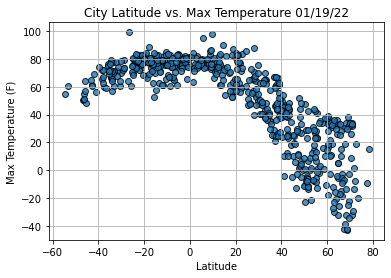

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

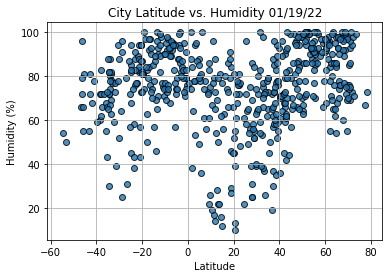

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

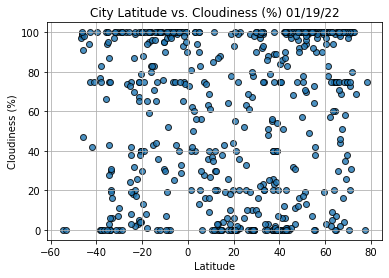

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

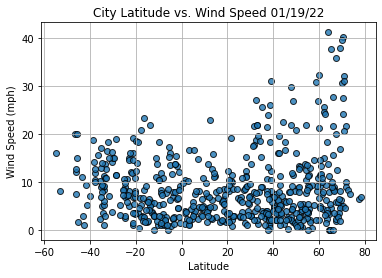

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
#The syntax to get a specific row from a current DataFrame is:
index13 = city_data_df.loc[13]
index13

City                    Esperance
Country                        AU
Date          2022-01-19 21:49:04
Lat                      -33.8667
Lng                         121.9
Max Temp                    57.04
Humidity                       80
Cloudiness                      0
Wind Speed                  11.21
Name: 13, dtype: object

In [24]:
#We can also filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
565    False
566     True
567    False
568    False
569     True
Name: Lat, Length: 570, dtype: bool

In [25]:
#If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Yumen,CN,2022-01-19 21:49:00,40.2833,97.2000,23.72,36,84,4.94
4,Almansa,ES,2022-01-19 21:49:01,38.8692,-1.0971,38.89,78,0,1.19
5,Zhicheng,CN,2022-01-19 21:49:01,30.2956,111.5047,47.79,64,100,2.91
6,Albany,US,2022-01-19 21:46:52,42.6001,-73.9662,41.58,66,90,4.61
7,Macau,MO,2022-01-19 21:49:02,22.2006,113.5461,59.13,72,20,11.50


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

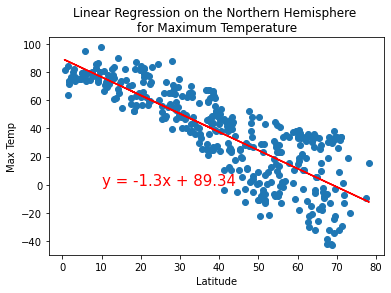

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,0))

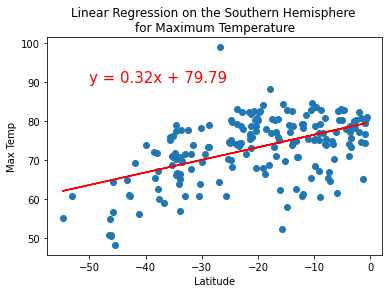

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

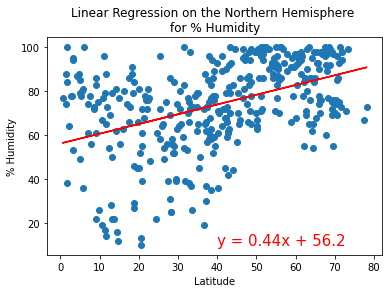

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

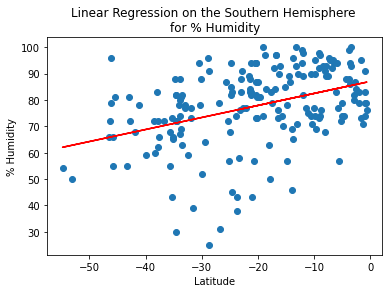

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

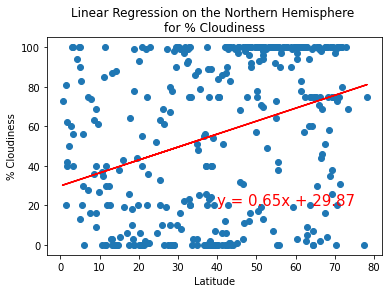

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,20))

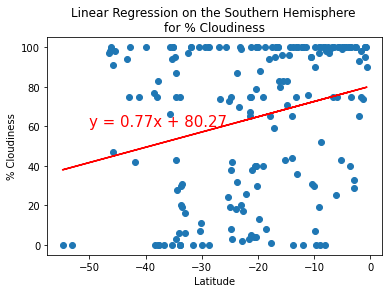

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

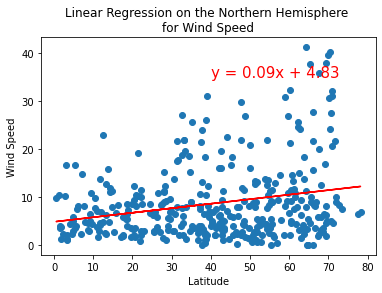

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))


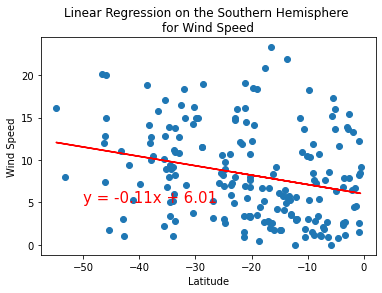

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,5))